In [4]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [3]:
fp_df = pd.read_hdf('60hr.h5', key='fp_df_1')

In [4]:
fp_df.head()

,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,fp9,...,fp368,fp369,fp370,fp371,fp372,fp373,fp374,fp375,fp376,fp377
1.524384e+09,44815.308447,50136.591974,54504.876195,49182.659160,61599.747203,67023.823772,34865.501632,50679.921286,56152.798738,44691.846737,...,51362.463269,52521.423652,57828.580799,51667.134156,54328.319671,55908.205009,51020.741583,48657.023749,53067.058335,46071.516038
1.524384e+09,44813.557805,50136.812786,54504.847814,49179.039740,61617.083213,67052.558501,34861.256291,50680.136196,56152.722561,44689.910160,...,51364.096540,52521.404692,57828.809294,51665.790046,54334.735590,55907.660280,51020.949981,48657.255171,53066.653243,46073.627871
1.524384e+09,44811.612966,50136.926004,54504.661709,49161.000962,61612.243632,67106.407783,34862.792499,50678.661237,56152.912318,44690.815254,...,51360.941277,52521.709394,57828.814350,51666.119102,54322.735147,55907.053522,51020.827092,48657.335767,53067.248625,46072.209039
1.524384e+09,44814.102251,50136.221101,54504.750566,49166.292558,61594.322396,67141.588904,34861.410887,50678.875692,56153.008911,44676.565804,...,51361.766782,52522.078776,57828.958535,51666.949258,54310.972802,55907.077760,51020.744616,48657.436664,53068.306905,46069.858573
1.524384e+09,44814.586175,50135.751997,54504.903936,49173.543345,61566.640994,67165.543955,34860.049081,50679.886601,56153.078168,44680.502925,...,51366.259384,52522.491979,57829.345389,51668.152724,54308.248353,55908.789087,51021.110924,48657.824592,53069.461124,46072.039075


In [5]:
fp_df.shape

(257281, 378)

In [6]:
257281/60/60

71

In [8]:
subrun_df = pd.read_hdf('60hr.h5', key='subrun_df')

print subrun_df.shape
subrun_df.head()

(27275, 24)


,run,subrun,start_time,end_time,start_gps,end_gps,ctags,t0val,fills,quad_condition,...,fillcuts_ok,field_ok,trolley_period,field_period,ctags_loose_ok,quad_loose_ok,ctags_repeat_ok,losses_repeat_ok,fillcuts_repeat_ok,ok
0,15921,0,1.524421e+09,1.524421e+09,1.524421e+09,1.524421e+09,0,0.0,0,12.1/18.0,...,False,True,0.0,1.0,False,None,None,None,None,False
1,15921,1,1.524421e+09,1.524421e+09,1.524421e+09,1.524421e+09,0,0.0,0,13.1/18.0,...,False,True,0.0,1.0,False,None,None,None,None,False
2,15921,2,1.524421e+09,1.524421e+09,1.524421e+09,1.524421e+09,0,0.0,0,13.1/18.0,...,False,True,0.0,1.0,False,None,None,None,None,False
3,15921,3,1.524421e+09,1.524421e+09,1.524421e+09,1.524421e+09,0,0.0,0,13.1/18.0,...,False,True,0.0,1.0,False,None,None,None,None,False
4,15921,4,1.524421e+09,1.524421e+09,1.524421e+09,1.524421e+09,0,0.0,0,13.1/18.0,...,False,True,0.0,1.0,False,None,None,None,None,False


## Last trolley run of endgame
Something weird happened, can't fit a global drift.

In [9]:
tr_moment_df_9 = helper.calc_moment_df(pd.read_hdf('endgame.h5', 'tr_df_9'))

Finished calculating all moments for 3265 events.


In [20]:
prefix = 'data2/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_'
tr_interp_df_9 = helper.root_to_pandas([5303], prefix=prefix, tr_run=True)
tr_moment_df_9 = helper.calc_moment_df(tr_interp_df_9)

Reading event 6530/6538 99.88%               
loop done: 100%                                    
Reading event 1960/1968 99.59%   
loop done: 100%                                    
Finished calculating all moments for 3265 events.


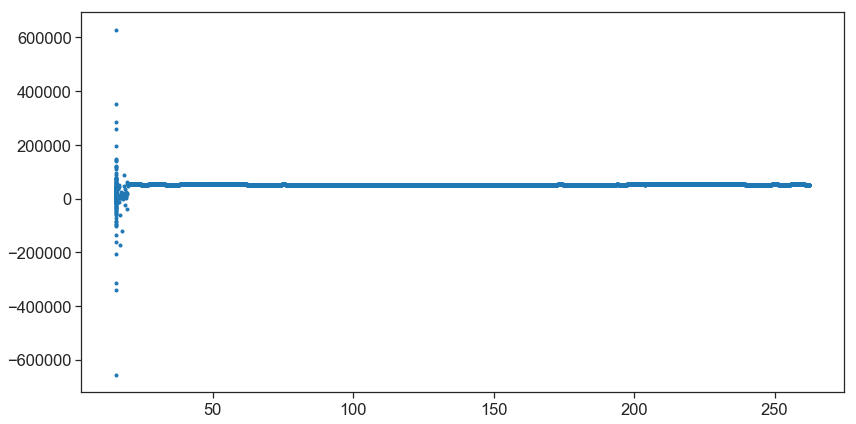

In [21]:
fig, ax = plt.subplots(1,1)
plt.plot(tr_moment_df_9['tr_phi'], tr_moment_df_9['tr,m1'],'.')

fig.set_size_inches(12,6)
fig.tight_layout()